In [32]:
from pathlib import Path
import re
from PIL import ImageDraw, Image
import matplotlib.pyplot as plt

In [30]:
path = Path.home() / 'OneDrive - Seagroup/ai/space_image_captioning_dataset'
max_seq_len = 30


def text_normalize(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip()
    text = '<start> ' + text + ' <end>'

    return text


with open(path / 'space_captions.txt', 'r', encoding='utf8') as f:
    lines = f.readlines()
    dataset_dict = {}
    skipped_images_lst = []
    corpus = []
    for line in lines:
        line = line.rstrip('\n')
        img_path, caption = line.split('\t')

        tokens = caption.split(' ')
        img_path = path / 'space_images' / img_path.split('/')[-1]

        if len(tokens) < 5 or len(tokens) > (max_seq_len - 2):
            skipped_images_lst.append([img_path, line])
            continue
        else:
            normalized_caption = text_normalize(caption)
            corpus.append(normalized_caption)
            dataset_dict[img_path] = normalized_caption

In [31]:
def show_examples(data, seed=42, examples_per_class=3, size=(350, 350)):
    w, h = size
    label_example = data.features['labels'].names
    grid = Image.new('RGB', size=(examples_per_class * w, len(label_example) * h))
    draw = ImageDraw.Draw(grid)

    for lid, label in enumerate(label_example):
        # Filter the dataset by a single label, shuffle it, and grab a few samples
        ds_slice = (
            ds['train']
            .filter(lambda x: x['labels'] == lid)
            .shuffle(seed)
            .select(range(examples_per_class))
        )

        # Plot this label's examples along a row
        for i, example in enumerate(ds_slice):
            img = example['image']
            idx = examples_per_class * lid + i
            box = (idx % examples_per_class * w, idx // examples_per_class * h)
            grid.paste(img.resize(size), box=box)
            draw.text(box, label, (255, 255, 255))
    return grid

[[WindowsPath('C:/Users/Kevin/OneDrive - Seagroup/ai/space_image_captioning_dataset/space_images/IMG_000015.jpg'),
  './space_image_captioning_dataset/space_images/IMG_000015.jpg\tSao Mộc'],
 [WindowsPath('C:/Users/Kevin/OneDrive - Seagroup/ai/space_image_captioning_dataset/space_images/IMG_000023.jpg'),
  './space_image_captioning_dataset/space_images/IMG_000023.jpg\tTokamak'],
 [WindowsPath('C:/Users/Kevin/OneDrive - Seagroup/ai/space_image_captioning_dataset/space_images/IMG_000048.jpg'),
  './space_image_captioning_dataset/space_images/IMG_000048.jpg\tThiên hà Tiên Nữ'],
 [WindowsPath('C:/Users/Kevin/OneDrive - Seagroup/ai/space_image_captioning_dataset/space_images/IMG_000085.jpg'),
  './space_image_captioning_dataset/space_images/IMG_000085.jpg\tTàu Lunar Flashlight'],
 [WindowsPath('C:/Users/Kevin/OneDrive - Seagroup/ai/space_image_captioning_dataset/space_images/IMG_000124.jpg'),
  './space_image_captioning_dataset/space_images/IMG_000124.jpg\tQuầng Halo'],
 [WindowsPath('C:/Us

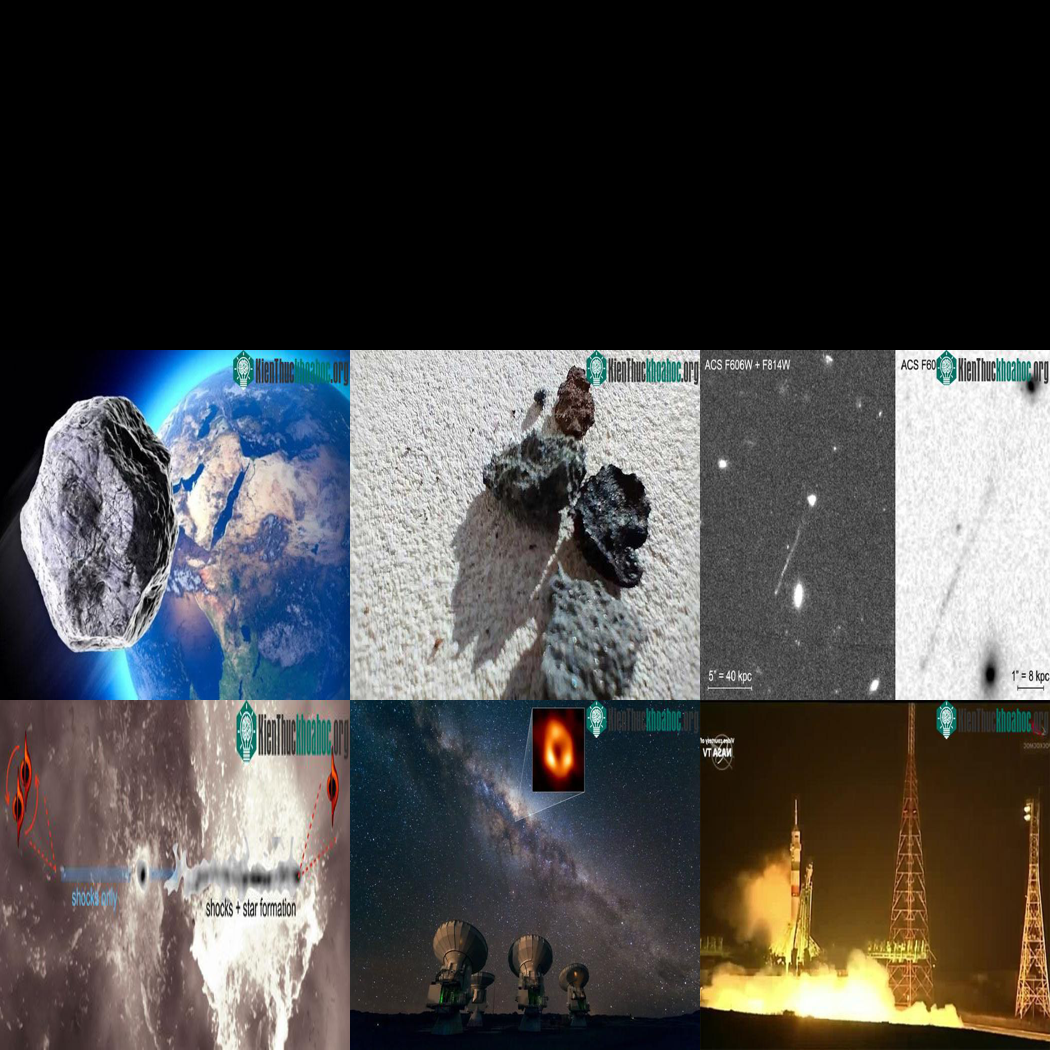

In [43]:
size = (350, 350)
w, h = 350, 350
# label_example = data.features['labels'].names
grid = Image.new('RGB', size=(3 * w, 3 * h))
draw = ImageDraw.Draw(grid)

for idx, (img_path, caption) in enumerate(dataset_dict.items()):
    img = Image.open(str(img_path))
    idx = 3 + idx
    box = (idx % 3 * w, idx // 3 * h)
    grid.paste(img.resize(size), box=box)
        # draw.text(box, label, (255, 255, 255))
    if idx == 2:
        break
grid

In [38]:
v

WindowsPath('C:/Users/Kevin/OneDrive - Seagroup/ai/space_image_captioning_dataset/space_images/IMG_000001.jpg')

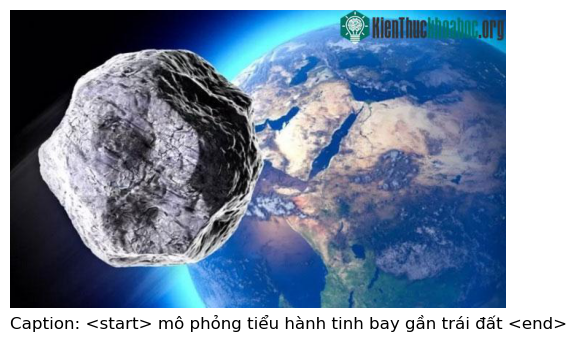

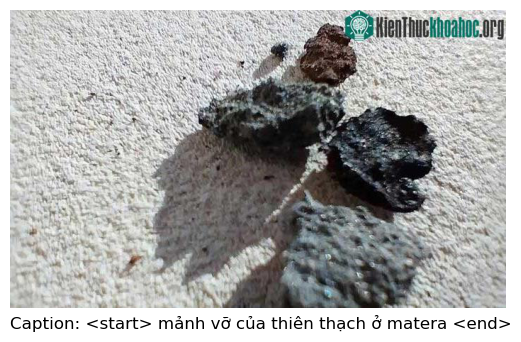

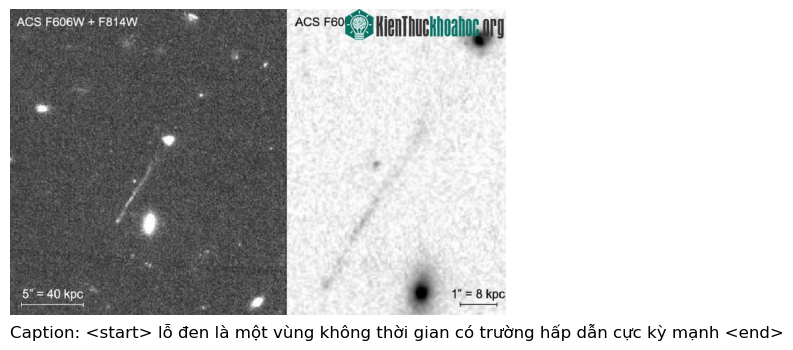

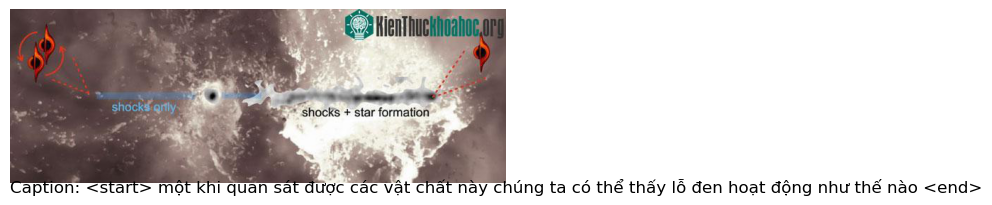

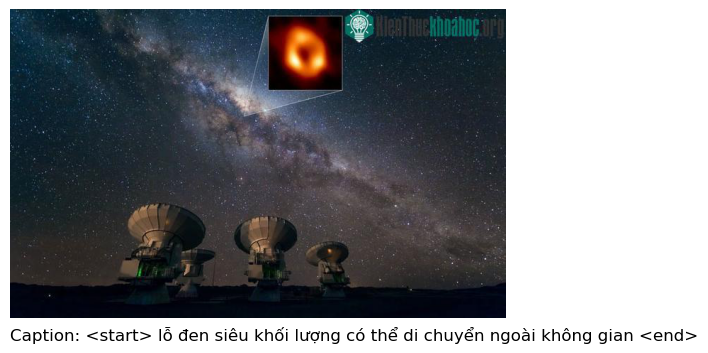

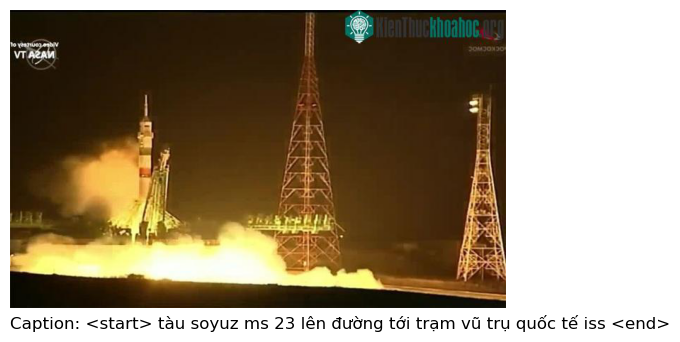

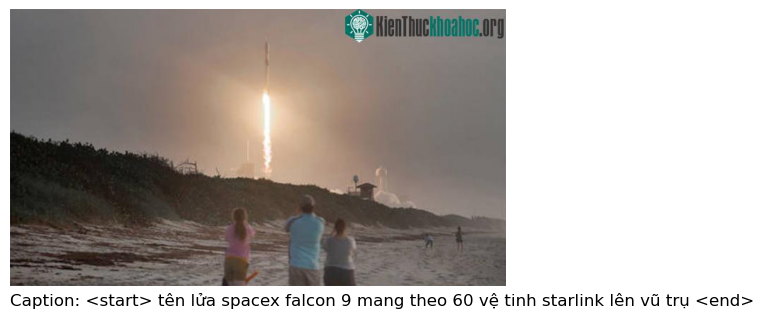

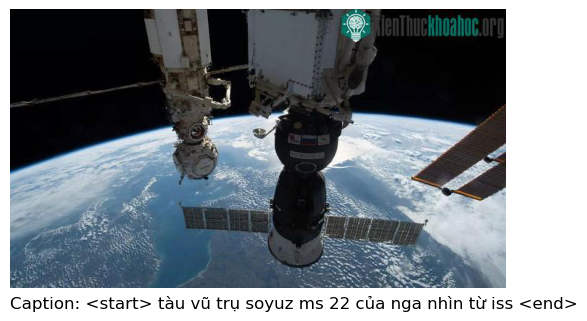

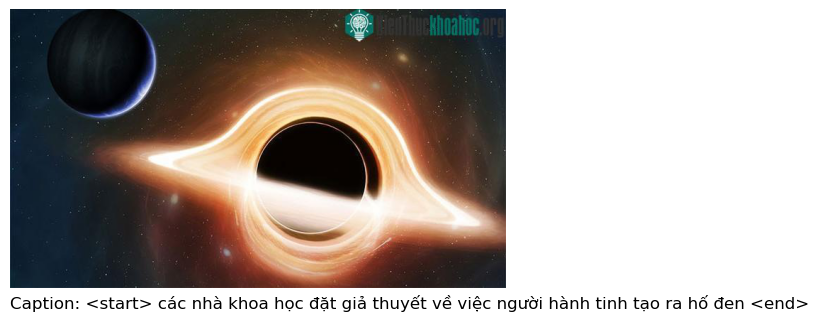

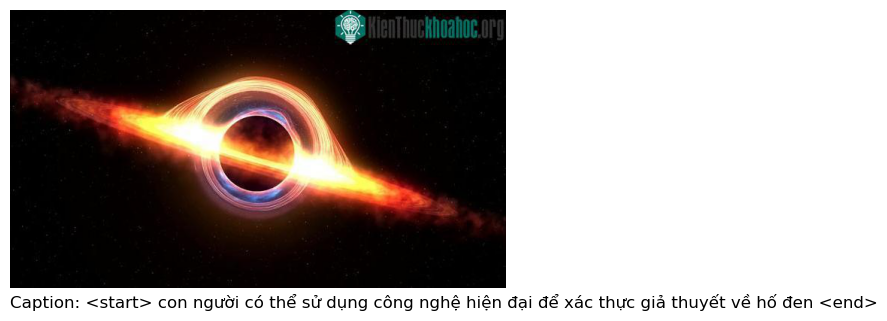

In [26]:
items_to_show = [(img_path, caption) for idx, (img_path, caption) in enumerate(dataset_dict.items()) if idx < 20]

for idx in range(10):
    img_filename, caption = items_to_show[idx]
    img = Image.open(str(img_filename))
    plt.imshow(img)
    plt.title(f'Caption: {caption}', loc='left', y=-0.1)
    plt.axis('off')
    plt.show()

In [19]:
img_path

WindowsPath('C:/Users/Kevin/OneDrive - Seagroup/ai/space_image_captioning_dataset/IMG_009419.jpg')